### Investment and Trading Capstone Project
# Build a Stock Price Indicator

## Description

Investment firms, hedge funds and even individuals have been using financial models to better understand market behavior and make profitable investments and trades. A wealth of information is available in the form of historical stock prices and company performance data, suitable for machine learning algorithms to process.


For this project, the task is to build a stock price predictor that takes daily trading data over a certain date range as input, and outputs projected estimates for given query dates. Note that the inputs will contain multiple metrics, such as opening price (Open), highest price the stock traded at (High), how many stocks were traded (Volume) and closing price adjusted for stock splits and dividends (Adjusted Close); your system only needs to predict the Adjusted Close price.


Feel free to choose what form your project takes (a simple script, a web app/service, Android/iOS app, etc.), and any additions/modifications to make to the project (e.g. suggesting what trades to make). Make sure you document your intended features in your report.

### Step one: Download the data

1.Yahoo! Finance: You can directly query for a stock through the web API, or download a dump of .csv files and use them.

2.Bloomberg API: Multiple APIs available, including Python.

3.Quandl: Also multiple APIs, including Python.

#### Input:
Open, High, Low, Close, Volume and Adjusted Close
#### Output:
Adjusted Close

#### Yahoo Finance:
Direct Download: Go to Yahoo Finance.
-Enter a quote into the search field.
-Select a quote in the search results to view it.
-Click Historical Data.
-Select a Time Period, data to Show, and Frequency.
-Click Apply.
-To use the data offline, click Download Data.

In [46]:
import os
import numpy as np
import pandas as pd

import random
import matplotlib.pyplot as plt

## load the data

In [69]:
### example of .csv file downloaded from Yahoo Finance
# Define date range 
start_date='2010-01-01'
end_date='2018-12-31'
dates=pd.date_range(start_date, end_date)

symbols=['GOOG', 'IBM', 'GLD']

In [71]:
def symbol_to_path(symbol, base_dir=''):
    """
    return the path of csv file
    """
    return os.path.join(base_dir,'{}.csv'.format(str(symbol)))

In [87]:
def get_data(symbols, dates):
    """
    read the stock data from given symbols 
    """
    # Create a new empty date frame
    df=pd.DataFrame(index=dates)
    if 'SPY' not in symbols:   
        symbols.insert(0, 'SPY')  # use SPY for the reference
        
    for symbol in symbols:
        df_temp=pd.read_csv(symbol_to_path(symbol), index_col='Date', 
                            parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp=df_temp.rename(columns={'Adj Close': symbol})
        df=df.join(df_temp)
        
        if symbol == 'SPY': # drop dates SPY did not trade, wipe nan
            df=df.dropna(subset=['SPY'])
    
    return df

In [73]:
def plot_data(df, title='Stock prices'):
    """
    Plot the stock prices
    """
    ax=df.plot(title=title, fontsize=3)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    
    plt.show()

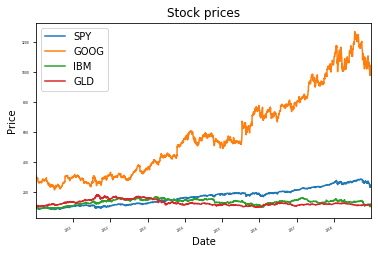

In [88]:
df=get_data(symbols, dates)
plot_data(df)

In [77]:
def plot_selected(df, columns, start_index, end_index):
    """
    Plot the desired columns over the index in the given range
    """
    plot_data(df.loc[start_index:end_index, columns], title='Selected Data')

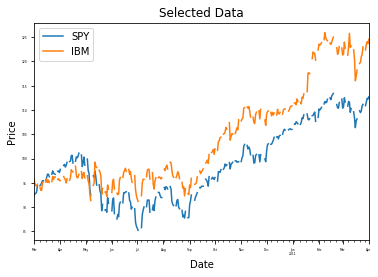

In [79]:
plot_selected(df, ['SPY', 'IBM'], '2010-03-01', '2011-04-01')

In [91]:
def normalize_data(df):
    """
    Normalize stock prices using the first row of the dataframe
    """
    return df/df.iloc[0,:]

In [89]:
df.head()

,SPY,GOOG,IBM,GLD
2010-01-04,93.675278,312.204773,98.142967,109.800003
2010-01-05,93.923241,310.829926,96.957375,109.699997
2010-01-06,93.989357,302.994293,96.327530,111.510002
2010-01-07,94.386139,295.940735,95.994110,110.820000
2010-01-08,94.700218,299.885956,96.957375,111.370003


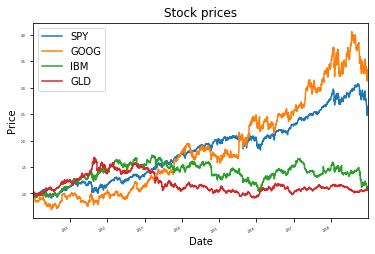

In [92]:
df=normalize_data(df)
plot_data(df)

## explore the data

In [22]:
f1=fdyh1[['Open','High','Low','Close','Adj Close']]

In [23]:
f1

,Open,High,Low,Close,Adj Close
0,1025.209961,1025.209961,1014.619995,1020.619995,1020.619995
1,1019.520020,1028.449951,996.280029,998.039978,998.039978
2,996.070007,1000.340027,991.969971,994.750000,994.750000
3,996.119995,1003.429993,992.250000,1003.239990,1003.239990
4,1003.840027,1016.479980,1001.650024,1016.400024,1016.400024
5,1018.669983,1026.069946,1018.669983,1025.390015,1025.390015
6,1025.359985,1036.339966,1023.969971,1033.369995,1033.369995
7,1032.989990,1044.140015,1028.040039,1044.140015,1044.140015
8,1043.920044,1048.180054,1038.400024,1042.729980,1042.729980
9,1040.150024,1049.739990,1035.000000,1049.339966,1049.339966


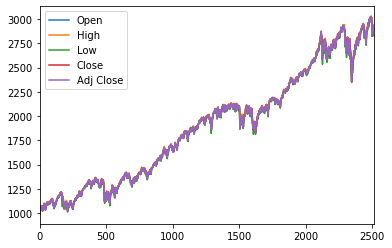

In [24]:
f1.plot()
plt.show()

In [17]:
type(fdyh1.Date[2512])

str

In [19]:
dates=pd.date_range('2009-08-31','2019-08-29')

In [20]:
dates

DatetimeIndex(['2009-08-31', '2009-09-01', '2009-09-02', '2009-09-03',
               '2009-09-04', '2009-09-05', '2009-09-06', '2009-09-07',
               '2009-09-08', '2009-09-09',
               ...
               '2019-08-20', '2019-08-21', '2019-08-22', '2019-08-23',
               '2019-08-24', '2019-08-25', '2019-08-26', '2019-08-27',
               '2019-08-28', '2019-08-29'],
              dtype='datetime64[ns]', length=3651, freq='D')